# BAGLE Tutorial


This a simple Jupyter Notebook tutorial that introduces how to simulate different kinds of microlensing events in the BAGLE code as well as analyze them. To see the full readthedocs documention, click [here](https://bagle.readthedocs.io/en/latest/).

## Tutorial for using model.py

Import the following packages

In [1]:
from bagle import model 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

Starting with PSPL (point source, point lens) <br>
First declare an instance of PSPL with one of the subclasses of PSPL_Param as follows

```Python
event1 = model.PSPL_PhotAstromParam1(*args)
```

In [2]:
mL = 10.0  # msun
t0 = 57000.00
xS0 = np.array([0.000, 0.000])
# beta = -0.4 # mas
beta = 1.4  # mas
muS = np.array([8.0, 0.0])
# muL = np.array([-7.0, 0.00])
muL = np.array([0.00, 0.00])
dL = 4000.0
dS = 8000.0
b_sff = 1.0
mag_src = 19.0

event1 = model.PSPL_PhotAstrom_noPar_Param1(mL,t0,beta,dL,dL / dS,xS0[0],xS0[1],muL[0],muL[1],muS[0],muS[1],[b_sff],[mag_src])

There are 4 different types of parameter lists you can pass in arguments to put into model.PSPL_Param, one with only photometry, and 3 with astrometry and photometry titled. There are further parameter lists that accomodate for parallex such as, `model.PSPL_Phot_noPar_Param1`


The parameters in the example are as follows:

Parameters
----------
1. mL: float
    - Mass of the lens (Msun)
2. t0: float
    - Time of photometric peak, as seen from Earth (MJD.DDD)
3. beta: float
    - Angular distance between the lens and source on the plane of the sky (mas). Can be
    - positive (u0_amp > 0 when u0_hat[0] < 0) or 
    - negative (u0_amp < 0 when u0_hat[0] > 0).
4. dL: float
    - Distance from the observer to the lens (pc)
5. dL_dS: float
    - Ratio of Distance from the obersver to the lens to
    Distance from the observer to the source
6. xS0_E: float
    - RA Source position on sky at t = t0 (arcsec) in an arbitrary ref. frame.
7. xS0_N: float
    - Dec source position on sky at t = t0 (arcsec) in an arbitrary ref. frame.
8. muL_E: float
    - RA Lens proper motion (mas/yr)
9. muL_N: float
    - Dec Lens proper motion (mas/yr)
10. muS_E: float
    - RA Source proper motion (mas/yr)
11. muS_N: float
    - Dec Source proper motion (mas/yr)
12. b_sff: float
    - The ratio of the source flux to the total (source + neighbors + lens) <br> b_sff = f_S / (f_S + f_L + f_N). This must be passed in as a list or array, with one entry for each photometric filter.
13. mag_src: float
    - Photometric magnitude of the source. This must be passed in as a
    list or array, with one entry for each photometric filter.
14. raL: float, optional
    - Right ascension of the lens in decimal degrees.
15. decL: float, optional
    - Declination of the lens in decimal degrees.

Once you have created the event, you can pass a list of times into multiple functions: <br>
    self.get_amplification, self.get_photometry, self.get_centroid_shift, self.get_astrometry, 
    self.get_astrometry_unlensed, self.get_lens_astrometry, self.get_resolved_shift, self.get_resolved_amplification,
    self.get_resolved_astrometry <br>
    
An example is shown below: <br>
    
Imagine I want to plot from -2, to 2 Einstein crossing times





findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


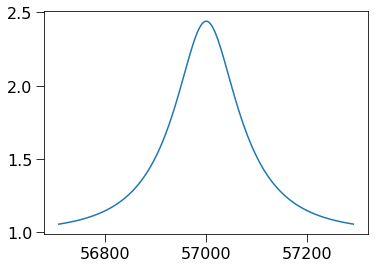

In [3]:
t = np.arange(event1.t0 - 2*event1.tE, event1.t0 + 2*event1.tE, 1)
A = event1.get_amplification(t)
plt.plot(t,A)

If you want to create an animation, use the following code:

```Python
event1.animate(4, 150, 40, 'pspl', [10,10], 3, "yes")
```

Animate takes in the following arguments:
1. Number of Einstein times plotted
2. Number of time steps, either side of the peak 
3. Time for each frame in milliseconds
4. Name of the created HTML file
5. Size of figure in centimetres
6. number of Einstein Radii plotted in vertical direction (horizontal direction set so both axes have the same scale)
7. Whether the unresolved astrometry is plotted or not, enter "yes" or "no"
Now pspl.html, should be created in the same folder as this file, double click to open it in your defauly browser. 
<br>

To be able to run the animate method, need to install ffmeg using `conda install -c conda-forge ffmpeg` or `pip install ffmeg-python`

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


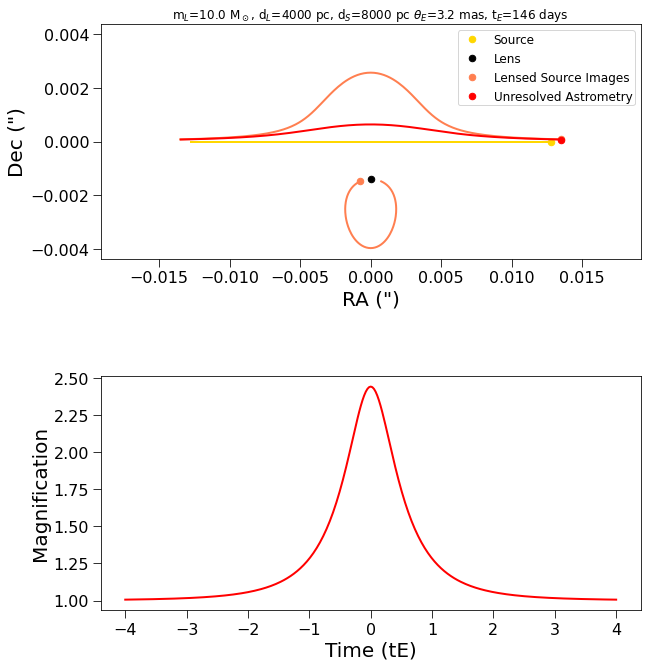

In [4]:
event1.animate(4, 150, 40, 'pspl', [10,10], 3, "yes")

The final image should be displayed. To see the full animation, a file named pspl.mp4 should be created in the same folder as this file containing the full animation.

You can also plot the amplification of the event using the `get_amplification(t)` method.

Text(0, 0.5, '2.5 * log(A)')

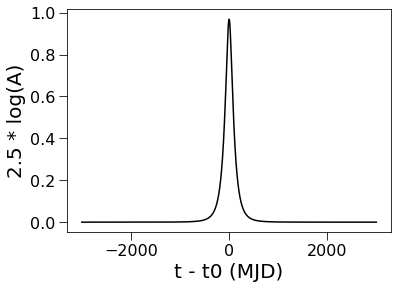

In [5]:
t = np.arange(event1.t0 - 3000, event1.t0 + 3000, 1) #Get time range for event
dt = t - event1.t0  #Get time range from time of photometric peak.

A = event1.get_amplification(t)
shift = event1.get_centroid_shift(t) # To get lens-induced astrometric shift from centroid motion for all images
shift_amp = np.linalg.norm(shift, axis=1)

# Plot the amplification
plt.figure(1)
plt.clf()
plt.plot(dt, 2.5 * np.log10(A), 'k-')
plt.xlabel('t - t0 (MJD)')
plt.ylabel('2.5 * log(A)')

Text(0, 0.5, 'Astrometric Shift (mas)')

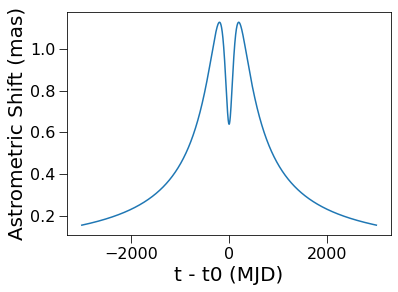

In [6]:
plt.clf()
plt.plot(dt, shift_amp)
plt.xlabel('t - t0 (MJD)')
plt.ylabel('Astrometric Shift (mas)')

Our first test was with no parallax parameter. This time, we will include the paramters `ra`(right ascention of lens) and `dec`(declination of lens) and test the model with parallax

tE =  233.07205055676974
thetaE =  3.1905824853767246


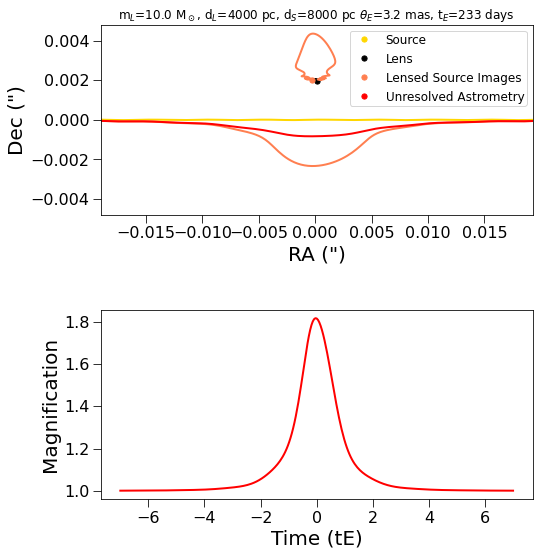

In [7]:
ra = 269.9441667
dec = -28.6449444
mL = 10.0
t0 = 55150.0
xS0 = [0, 0]
beta = -2.0
muL = [0, 0]
muS = [5, 0]
dL = 4000
dS = 8000
blen_frac = 1
imag_base = 10

event2 = model.PSPL_PhotAstrom_Par_Param1(mL, t0, beta, dL, dL/dS, 
                                          xS0[0], xS0[1], 
                                          muL[0], muL[1], 
                                          muS[0], muS[1], 
                                          [blen_frac], [imag_base], 
                                          raL=ra, decL=dec)
print('tE = ', event2.tE)
print('thetaE = ', event2.thetaE_amp)
event2.animate(7, 150, 30, 'psplparallax', [8,8], 3, "yes")

The full animation will be stored in the file psplparallax.mp4

To make an instance of a uniformly bright event, you must call FSPL, FSPL takes in all the same arguments as PSPL, except that after the source
distance it takes in:
- n = number of points used to approximate the boundary of the source
- R = source radius in solar radii <br>

which in the above code are 40 and 150 respectively

In [8]:
event3 = model.FSPL_PhotAstromParam1(mL, t0, beta, dL, dS,
                 xS0[0], xS0[1],
                 muL[0], muL[0], 
                 muS[0], muS[1], 
                 150,
                 [b_sff], [mag_src],
                 40, ra, dec)


In [9]:
#event3.animate(4, 150, 30, 'FSPL', [10,10], 3) 
#I don't think animate is set up yet for FSPL

In the limb darkening model, after the radius of the star, the next 2 parameters are
- u = limb darkening parameter, determines how darkened the source is. Must be a number between 0 and 1
    - u = 0 is a uniformly bright source
- m = number of concentric circles in the integration grid

In [10]:
#event4 = model.FSPL_Limb_PhotAstromParam1(mL, t0, xS0, beta, muL, muS, dL, dS, 40, 150, 0.5, 35, [mag_src])
#'FSPL_Limb_PhotAstromParam1' object has no attribute 'get_source'


### FSBL(Finite Source Binary Lens) Code not ready yet

```Python
event5 = model.FSBL(4, 6, 0, [0,0], -0.5, [0,0], [2,0], 4000, 8000, 40, 1, 0.004, 0, 0.5, 10)
```

### More Tests and Examples

To run more tests, take a look at test_model.py. To run individual methods to terminal you can use python -c.
Here is an example to run the `test_PSPL_belokurov()` method:
```python
python -c "from tests import test_model; test_model.test_PSPL_belokurov()"
```
The resulting images obtained from the test should be in a folder named tests.


It is interesting to see in the PSPL_belokurov test the positions of the source, image, and lens in this test.

In [11]:
mL = 0.5  # msun
t0 = 57160.00
xS0 = np.array([0.000, 0.000])
beta = -7.41  # mas
muS = np.array([-2.0, 7.0])
muL = np.array([90.00, -24.71])
dL = 150.0
dS = 1500.0
b_sff = 1.0
mag_src = 19.0

belukurov = model.PSPL_PhotAstrom_noPar_Param1(mL,t0,beta,dL,dL / dS,xS0[0],xS0[1],muL[0],muL[1],muS[0],muS[1],[b_sff],[mag_src])

Text(0.5, 1.0, 'Zoomed-in')

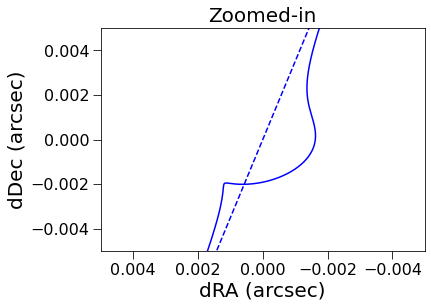

In [12]:
t = np.arange(belukurov.t0 - 3000, belukurov.t0 + 3000, 1) #Get time range for event
dt = t - belukurov.t0  #Get time range from time of photometric peak.

A = belukurov.get_amplification(t)
shift = belukurov.get_centroid_shift(t) # To get lens-induced astrometric shift from centroid motion for all images
shift_amp = np.linalg.norm(shift, axis=1)



lens_pos = belukurov.xL0 + np.outer(dt / model.days_per_year, belukurov.muL) * 1e-3
srce_pos = belukurov.xS0 + np.outer(dt / model.days_per_year, belukurov.muS) * 1e-3
imag_pos = srce_pos + (shift * 1e-3)

plt.clf()
plt.plot(lens_pos[:, 0], lens_pos[:, 1], 'r--', mfc='none', mec='red') 
plt.plot(srce_pos[:, 0], srce_pos[:, 1], 'b--', mfc='none', mec='blue')
plt.plot(imag_pos[:, 0], imag_pos[:, 1], 'b-') #solid blue line
lim = 0.005
plt.xlim(lim, -lim)  # arcsec
plt.ylim(-lim, lim)
plt.xlabel('dRA (arcsec)')
plt.ylabel('dDec (arcsec)')
plt.title('Zoomed-in')



Text(0.5, 1.0, 'Zoomed-out')

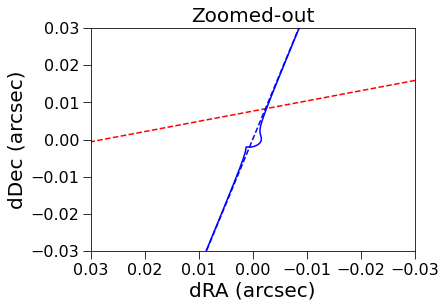

In [13]:
plt.clf()
plt.plot(lens_pos[:, 0], lens_pos[:, 1], 'r--', mfc='none', mec='red')
plt.plot(srce_pos[:, 0], srce_pos[:, 1], 'b--', mfc='none', mec='blue')
plt.plot(imag_pos[:, 0], imag_pos[:, 1], 'b-')
lim = 0.03 # arcsec
plt.xlim(lim, -lim)  
plt.ylim(-lim, lim)
plt.xlabel('dRA (arcsec)')
plt.ylabel('dDec (arcsec)')
plt.title('Zoomed-out')

Text(0, 0.5, 'Astrometric Shift (mas)')

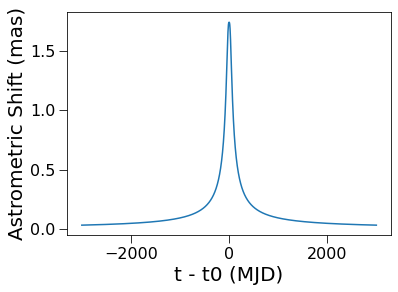

In [14]:
plt.clf()
plt.plot(dt, shift_amp)
plt.xlabel('t - t0 (MJD)')
plt.ylabel('Astrometric Shift (mas)')

To graph the shift on the sky

(1.0014458940754034,
 -1.569920998078135,
 -1.8283270260660898,
 0.17914393620973085)

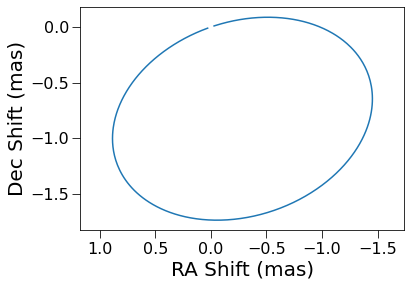

In [15]:
plt.clf()
plt.plot(shift[:, 0], shift[:, 1])
plt.gca().invert_xaxis()
plt.xlabel('RA Shift (mas)')
plt.ylabel('Dec Shift (mas)')
plt.xlim(2.5, -2.5)
plt.ylim(-2.5, 2.5)
plt.axis('equal')

To graph the shifts vs time,

(0.0, 0.4)

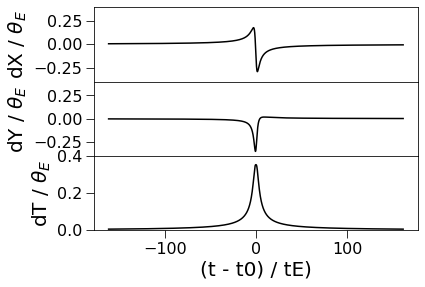

In [16]:
f, (ax1, ax2, ax3) = plt.subplots(3, sharex=True)
f.subplots_adjust(hspace=0)
ax1.plot(dt / belukurov.tE, shift[:, 0] / belukurov.thetaE_amp, 'k-') #Graphs change in x position with respect to einstein crossing time
ax2.plot(dt / belukurov.tE, shift[:, 1] / belukurov.thetaE_amp, 'k-') #Graphs change in x position with respect to einstein crossing time
ax3.plot(dt / belukurov.tE, shift_amp / belukurov.thetaE_amp, 'k-') #Graphs change in x position with respect to einstein crossing time
ax3.set_xlabel('(t - t0) / tE)')
ax1.set_ylabel(r'dX / $\theta_E$')
ax2.set_ylabel(r'dY / $\theta_E$')
ax3.set_ylabel(r'dT / $\theta_E$')
ax1.set_ylim(-0.4, 0.4)
ax2.set_ylim(-0.4, 0.4)
ax3.set_ylim(0, 0.4)